# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from newsapi import NewsApiClient
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
import datetime as dt
import json

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Vincent\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv('..')
api_key = os.getenv('NEWS_API_KEY')

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
# btc_articles = newsapi.get_top_headlines(q="bitcoin", language="en", country="au")
yesterday = (dt.datetime.today() - dt.timedelta(days=1)).strftime('%Y-%m-%d')
try:
    # Load the cached file (if it exists) to minimise api calls
    with open(f"btc_articles_{yesterday}.json", 'r') as f:
        btc_articles = json.load(f)
except FileNotFoundError:
    # Download the news articles
    btc_articles = newsapi.get_everything(
        q='bitcoin',
        from_param=yesterday,
        to=yesterday,
        language='en',
        sort_by='relevancy',
    )
    # Save the articles to a local file
    with open(f"btc_articles_{yesterday}.json", 'w') as f:
        json.dump(
            btc_articles,
            f,
            indent=4,
        )
btc_articles['totalResults']

144

In [5]:
# Fetch the Ethereum news articles
try:
    # Load the cached file (if it exists) to minimise api calls
    with open(f"eth_articles_{yesterday}.json", 'r') as f:
        eth_articles = json.load(f)
except FileNotFoundError:
    # Download the news articles
    eth_articles = newsapi.get_everything(
        q='ethereum',
        from_param=yesterday,
        to=yesterday,
        language='en',
        sort_by='relevancy',
    )
    # Save the articles to a local file
    with open(f"eth_articles_{yesterday}.json", 'w') as f:
        json.dump(
            eth_articles,
            f,
            indent=4,
        )
eth_articles['totalResults']

42

In [6]:
# Function to generate sentiment scores DataFrame
def get_sentiment_df(articles):
    sentiments = []

    for article in articles:
        try:
            text = article["content"]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]

            sentiments.append({
                "date": date,
                "text": text,
                "compound": compound,
                "positive": pos,
                "negative": neg,
                "neutral": neu
            })
            
        except AttributeError:
            pass
        
    # Create DataFrame
    df = pd.DataFrame(sentiments)

    return df


In [7]:
# Create the Bitcoin sentiment scores DataFrame
df_sent_btc = get_sentiment_df(btc_articles['articles'])
df_sent_btc.head()

,date,text,compound,positive,negative,neutral
0,2022-02-12,The news of one of the biggest money launderin...,0.5859,0.124,0.000,0.876
1,2022-02-12,For the past 12 years Anthony Welch and his pa...,-0.2500,0.000,0.059,0.941
2,2022-02-12,"Cryptocurrency was everywhere this week, fundi...",0.5267,0.102,0.000,0.898
3,2022-02-12,Many brands are starting to see a recovery des...,0.3903,0.087,0.037,0.877
4,2022-02-12,"THOUSAND OAKS, Calif. -- With another $1 milli...",0.8860,0.251,0.000,0.749


In [8]:
# Create the Ethereum sentiment scores DataFrame
df_sent_eth = get_sentiment_df(eth_articles['articles'])
df_sent_eth.head()

,date,text,compound,positive,negative,neutral
0,2022-02-12,Photo Illustration by Luis G. Rendon/The Daily...,-0.0865,0.071,0.106,0.823
1,2022-02-12,What happened \r\nThe cryptocurrency market st...,0.1154,0.042,0.000,0.958
2,2022-02-12,The cryptocurrency market has been shakier tha...,-0.0258,0.052,0.055,0.893
3,2022-02-12,"Bitcoin has climbed through February, with the...",-0.4019,0.000,0.121,0.879
4,2022-02-12,"For the past few years, cryptocurrencies have ...",0.5423,0.130,0.000,0.870


In [9]:
# Describe the Bitcoin Sentiment
desc_btc = df_sent_btc.describe()
desc_btc

,compound,positive,negative,neutral
count,20.000000,20.000000,20.00000,20.000000
mean,0.083335,0.053850,0.03910,0.907100
std,0.424570,0.069087,0.05005,0.065438
min,-0.709600,0.000000,0.00000,0.749000
25%,-0.250000,0.000000,0.00000,0.876750
50%,0.012900,0.035000,0.01850,0.895500
75%,0.318375,0.087250,0.05975,0.946750
max,0.886000,0.251000,0.17300,1.000000


In [10]:
# Describe the Ethereum Sentiment
desc_eth = df_sent_eth.describe()
desc_eth

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.149880,0.069200,0.032950,0.897900
std,0.385174,0.062107,0.044772,0.060803
min,-0.475300,0.000000,0.000000,0.793000
25%,-0.086500,0.031500,0.000000,0.862500
50%,0.121700,0.059500,0.000000,0.905000
75%,0.397700,0.083250,0.074750,0.939250
max,0.796400,0.207000,0.121000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

In [11]:
dp = 5
print("> Q: Which coin had the highest mean positive score?\n")
print(f"Bitcoin ({round(desc_btc['positive'][1], dp)}) has a {'higher' if desc_btc['positive'][1] > desc_eth['positive'][1] else 'lower'} mean positive score than Ethereum ({round(desc_eth['positive'][1], dp)})")
print('')

# Highest compound score
print("> Q: Which coin had the highest compound score?\n")
if desc_btc['compound'][-1] == desc_eth['compound'][-1]:
    message = f"Bitcoin and Ethereum have the same compound score of {round(desc_btc['compound'][-1], dp)}"
else:
    if desc_btc['compound'][-1] > desc_eth['compound'][-1]:
        high_coin = 'Bitcoin'
        high_score = desc_btc['compound'][-1]
        low_coin = 'Ethereum'
        low_score = desc_eth['compound'][-1]
    else:
        high_coin = 'Ethereum'
        high_score = desc_eth['compound'][-1]
        low_coin = 'Bitcoin'
        low_score = desc_btc['compound'][-1]
    message = f"{high_coin} had the highest compound score of {round(high_score, dp)} compared to {low_coin} which had a score of {low_score}"
print(message)
print('')

print("> Q: Which coin had the highest negative score?\n")
if desc_btc['negative'][-1] == desc_eth['negative'][-1]:
    message = f"Bitcoin and Ethereum have the same negative score of {round(desc_btc['negative'][-1], dp)}"
else:
    if desc_btc['negative'][-1] > desc_eth['negative'][-1]:
        high_coin = 'Bitcoin'
        high_score = desc_btc['negative'][-1]
        low_coin = 'Ethereum'
        low_score = desc_eth['negative'][-1]
    else:
        high_coin = 'Ethereum'
        high_score = desc_eth['negative'][-1]
        low_coin = 'Bitcoin'
        low_score = desc_btc['negative'][-1]
    message = f"{high_coin} has the highest negative score of {round(high_score, dp)} compared to {low_coin} which had a score of {low_score}"
print(message)
print('')

print("> Q: Which coin had the highest positive score?\n")
if desc_btc['positive'][-1] == desc_eth['positive'][-1]:
    message = f"Bitcoin and Ethereum have the same positive score of {round(desc_btc['positive'][-1], dp)}"
else:
    if desc_btc['positive'][-1] > desc_eth['positive'][-1]:
        high_coin = 'Bitcoin'
        high_score = desc_btc['positive'][-1]
        low_coin = 'Ethereum'
        low_score = desc_eth['positive'][-1]
    else:
        high_coin = 'Ethereum'
        high_score = desc_eth['positive'][-1]
        low_coin = 'Bitcoin'
        low_score = desc_btc['positive'][-1]
    message = f"{high_coin} has the highest positive score of {round(high_score, dp)} compared to {low_coin} which had a score of {low_score}"
print(message)


> Q: Which coin had the highest mean positive score?

Bitcoin (0.05385) has a lower mean positive score than Ethereum (0.0692)

> Q: Which coin had the highest compound score?

Bitcoin had the highest compound score of 0.886 compared to Ethereum which had a score of 0.7964

> Q: Which coin had the highest negative score?

Bitcoin has the highest negative score of 0.173 compared to Ethereum which had a score of 0.121

> Q: Which coin had the highest positive score?

Bitcoin has the highest positive score of 0.251 compared to Ethereum which had a score of 0.207


---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [13]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
custom_sw = {
    'char',
    'fi',
    'ha',
    'sa',
    'wa',
}
sw = sw | custom_sw

In [14]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""

    # Remove the punctuation from text
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)

    # Create a tokenized list of the words
    words = word_tokenize(re_clean)

    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]

    # Convert the words to lowercase
    # Remove the stop words
    tokens = [word.lower() for word in lem if word.lower() not in sw]

    return tokens

In [15]:
# Create a new tokens column for Bitcoin
df_sent_btc['tokens'] = df_sent_btc['text'].apply(lambda x: tokenizer(x))
df_sent_btc.head()

,date,text,compound,positive,negative,neutral,tokens
0,2022-02-12,The news of one of the biggest money launderin...,0.5859,0.124,0.000,0.876,"[news, one, biggest, money, laundering, scheme..."
1,2022-02-12,For the past 12 years Anthony Welch and his pa...,-0.2500,0.000,0.059,0.941,"[past, year, anthony, welch, partner, theresa,..."
2,2022-02-12,"Cryptocurrency was everywhere this week, fundi...",0.5267,0.102,0.000,0.898,"[cryptocurrency, everywhere, week, funding, an..."
3,2022-02-12,Many brands are starting to see a recovery des...,0.3903,0.087,0.037,0.877,"[many, brand, starting, see, recovery, despite..."
4,2022-02-12,"THOUSAND OAKS, Calif. -- With another $1 milli...",0.8860,0.251,0.000,0.749,"[thousand, oaks, calif, another, million, wort..."


In [16]:
# Create a new tokens column for Ethereum
df_sent_eth['tokens'] = df_sent_eth['text'].apply(lambda x: tokenizer(x))
df_sent_eth.head()

,date,text,compound,positive,negative,neutral,tokens
0,2022-02-12,Photo Illustration by Luis G. Rendon/The Daily...,-0.0865,0.071,0.106,0.823,"[photo, illustration, luis, g, rendonthe, dail..."
1,2022-02-12,What happened \r\nThe cryptocurrency market st...,0.1154,0.042,0.000,0.958,"[happenedthe, cryptocurrency, market, started,..."
2,2022-02-12,The cryptocurrency market has been shakier tha...,-0.0258,0.052,0.055,0.893,"[cryptocurrency, market, shakier, usual, past,..."
3,2022-02-12,"Bitcoin has climbed through February, with the...",-0.4019,0.000,0.121,0.879,"[bitcoin, climbed, february, combined, crypto,..."
4,2022-02-12,"For the past few years, cryptocurrencies have ...",0.5423,0.130,0.000,0.870,"[past, year, cryptocurrencies, run, circle, ar..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [17]:
from collections import Counter
from nltk import ngrams

In [18]:
# Generate the Bitcoin N-grams where N=2
bigrams_btc = ngrams(
    tokenizer(' '.join(df_sent_btc['text'])),
    n=2,
)
list(bigrams_btc)[:5]

[('news', 'one'),
 ('one', 'biggest'),
 ('biggest', 'money'),
 ('money', 'laundering'),
 ('laundering', 'scheme')]

In [19]:
# Generate the Ethereum N-grams where N=2
bigrams_eth = ngrams(
    tokenizer(' '.join(df_sent_eth['text'])),
    n=2,
)
list(bigrams_eth)[:5]

[('photo', 'illustration'),
 ('illustration', 'luis'),
 ('luis', 'g'),
 ('g', 'rendonthe'),
 ('rendonthe', 'daily')]

In [20]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [21]:
# Use token_count to get the top 10 words for Bitcoin
token_count(
    w
    for article_words in df_sent_btc['tokens'].to_list()
    for w in article_words
)

[('bitcoin', 11),
 ('market', 6),
 ('cryptocurrency', 4),
 ('one', 3),
 ('money', 3),
 ('world', 3),
 ('year', 3),
 ('million', 3),
 ('could', 3),
 ('investor', 3)]

In [22]:
# Use token_count to get the top 10 words for Ethereum
token_count(
    w
    for article_words in df_sent_eth['tokens'].to_list()
    for w in article_words
)

[('market', 7),
 ('year', 6),
 ('cryptocurrency', 5),
 ('bitcoin', 4),
 ('crypto', 4),
 ('go', 3),
 ('value', 3),
 ('coin', 3),
 ('friday', 3),
 ('past', 3)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

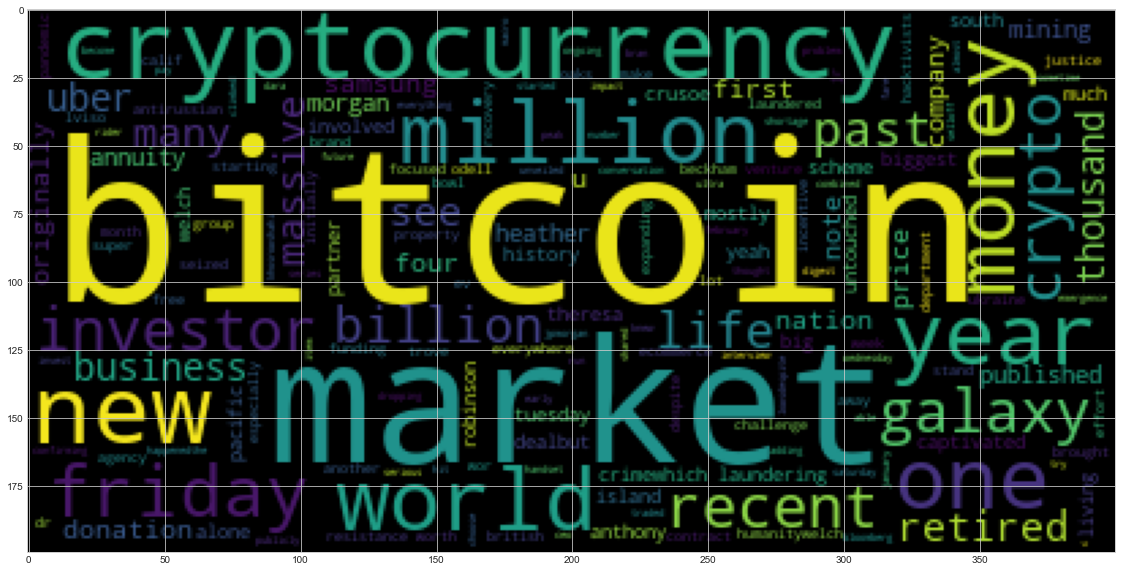

In [24]:
# Generate the Bitcoin word cloud
wc_btc = WordCloud(random_state=0).generate(
    ' '.join(tokenizer(
        ' '.join(df_sent_btc['text']))
    )
)
plt.imshow(wc_btc);

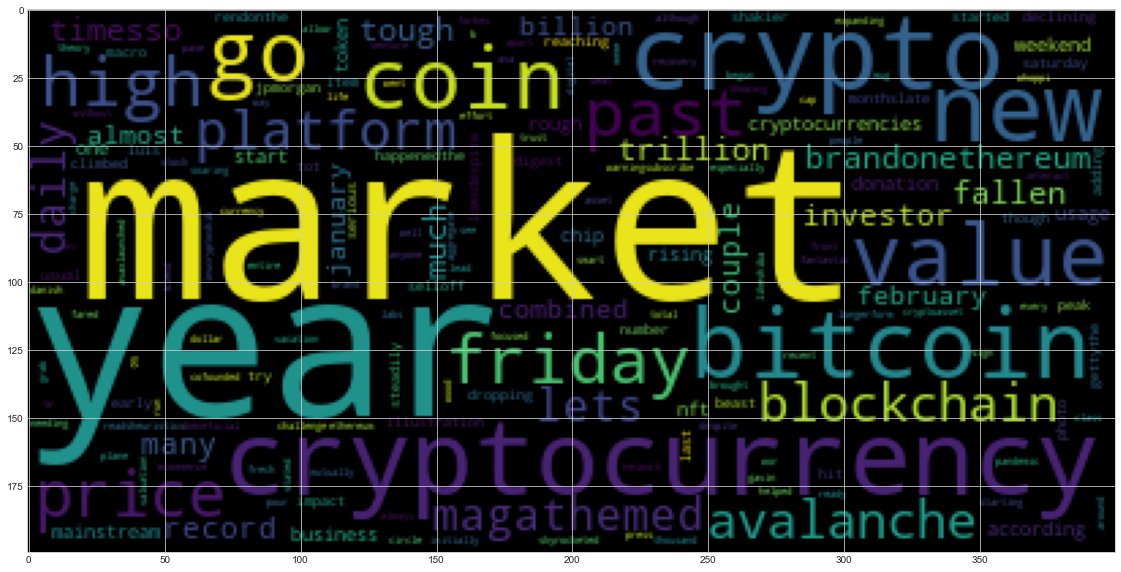

In [25]:
# Generate the Ethereum word cloud
wc_eth = WordCloud(random_state=0).generate(
    ' '.join(tokenizer(
        ' '.join(df_sent_eth['text']))
    )
)
plt.imshow(wc_eth);

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [26]:
import spacy
from spacy import displacy

In [27]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [28]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [29]:
# Concatenate all of the Bitcoin text together
text_btc = ' '.join(df_sent_btc['text'])

In [30]:
# Run the NER processor on all of the text
doc_btc = nlp(text_btc)

# Add a title to the document
doc_btc.user_data["title"] = "BTC NER"

In [31]:
# Render the visualization
displacy.render(doc_btc, style='ent')

In [32]:
# List all Entities
df_ent_btc = pd.DataFrame(
    [
        (ent.text, ent.label_)
        for ent in doc_btc.ents
    ],
    columns=['text', 'label']
)
df_ent_btc.head()

,text,label
0,one,CARDINAL
1,Tuesday,DATE
2,$4.5 billion,MONEY
3,the past 12 years,DATE
4,Anthony Welch,PERSON


---

### Ethereum NER

In [33]:
# Concatenate all of the Ethereum text together
text_eth = ' '.join(df_sent_eth['text'])

In [34]:
# Run the NER processor on all of the text
doc_eth = nlp(text_eth)

# Add a title to the document
doc_eth.user_data["title"] = "ETH NER"

In [35]:
# Render the visualization
displacy.render(doc_eth, style='ent')

In [36]:
# List all Entities
df_ent_eth = pd.DataFrame(
    [
        (ent.text, ent.label_)
        for ent in doc_btc.ents
    ],
    columns=['text', 'label']
)
df_ent_eth.head()

,text,label
0,one,CARDINAL
1,Tuesday,DATE
2,$4.5 billion,MONEY
3,the past 12 years,DATE
4,Anthony Welch,PERSON


---